# Neural network to predict system densities

### Read data

In [66]:
from hive import hive

In [67]:
gc_data=hive('data/gc_*.conf')
p_data=hive('data/p_*.conf')

size: 41875
size: 63851


### Loading tensorflow

In [68]:
import tensorflow as tf
from model.dense import model_fn
from model.data_pipeline import get_input_fn
from model.data_pipeline import get_predict_input_fn
from model.data_pipeline import get_mu_input_fn

##### Data to predict

In [69]:
from numpy import linspace,array,meshgrid,reshape
p=linspace(0,2,10)
rho=linspace(0,0.5,10)
X,Y=meshgrid(p,rho)
data=array([[a,b] for a in p for b in rho])

#### Define estimator

In [70]:
p_predict_input_fn,p_predict_init_hook=get_predict_input_fn(data)
p_estimator=tf.estimator.Estimator(model_fn=model_fn,model_dir='logp')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f40684c3d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


#### Calculate the predictions

In [71]:
p_predictions=p_estimator.predict(input_fn=p_predict_input_fn,hooks=[p_predict_init_hook])

In [72]:
predicted_rho_from_p=[x[0] for x in p_predictions]
rho=reshape(predicted_rho_from_p,(10,10))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logp/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Initializing iterator


#### Plotting

<IPython.core.display.Javascript object>


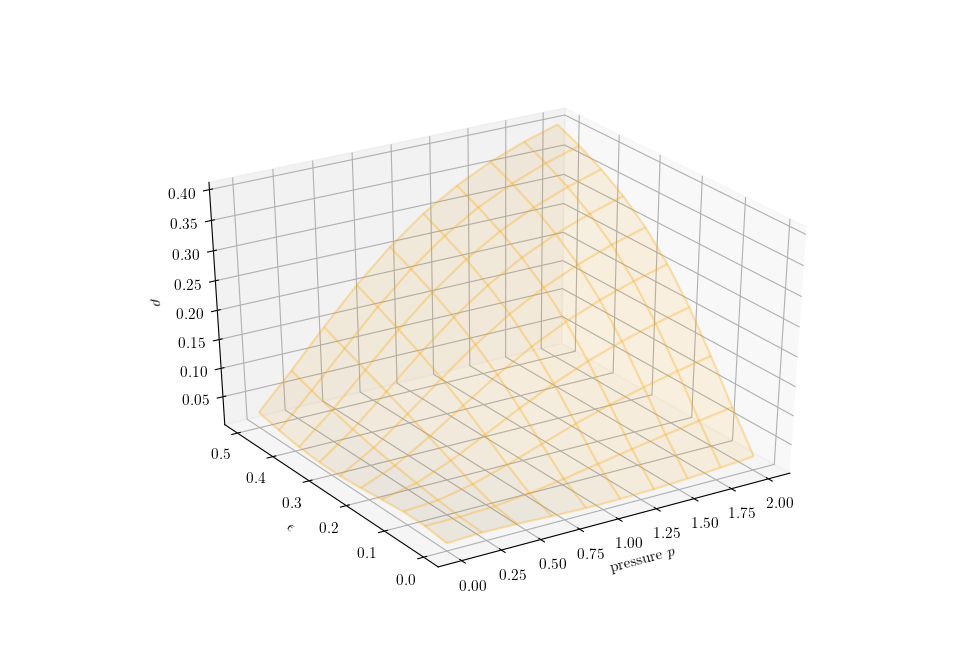

In [74]:
%matplotlib notebook
from matplotlib.pyplot import show,plot,figure
from mpl_toolkits.mplot3d import Axes3D
fig=figure()
ax=fig.add_subplot(111,projection='3d')

#ax.scatter(p_data._collective_pressure,p_data._collective_epsilon,p_data._collective_rho,alpha=0.03)
ax.plot_surface(X,Y,rho,alpha=0.1,color='orange')
ax.plot_wireframe(X,Y,rho,alpha=0.3,color='orange')

ax.set_xlabel(r"pressure $p$")
ax.set_ylabel(r"$\epsilon$")
ax.set_zlabel(r"$\rho$")
show()

In [43]:
mu_train_input_fn,mu_predict_input_fn,mu_train_init_hook=get_mu_input_fn(gc_data)
mu_estimator=tf.estimator.Estimator(model_fn=model_fn,model_dir='logmu')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'logmu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f3c615f6fd0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [44]:
mu_predictions=mu_estimator.predict(input_fn=mu_predict_input_fn,hooks=[mu_train_init_hook])
predicted_rho_from_mu=[x[0] for x in mu_predictions]

<TensorSliceDataset shapes: (2,), types: tf.float64>
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from logmu/model.ckpt-60600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Initializing iterator


<IPython.core.display.Javascript object>


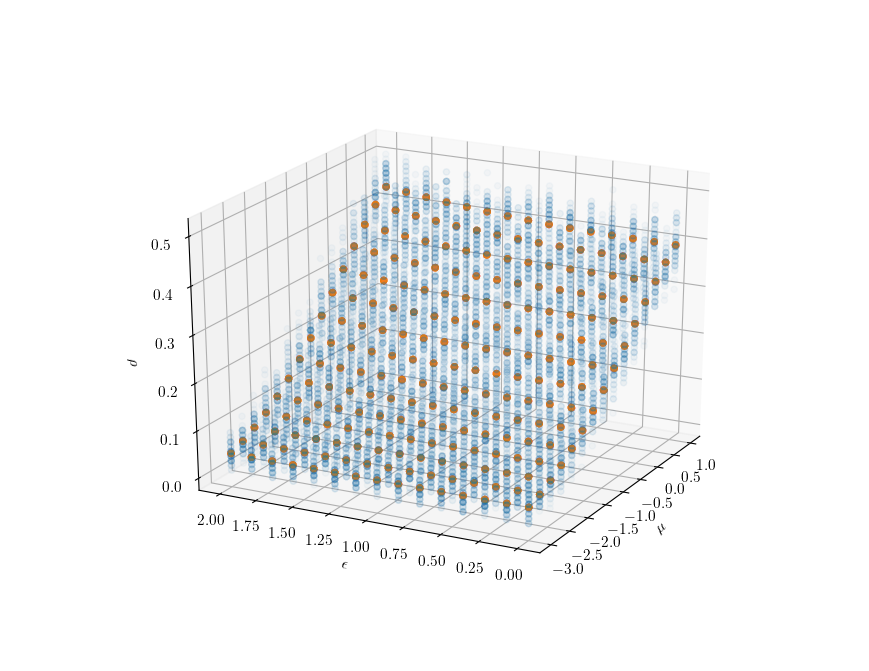

In [65]:
fig=figure()
ax=fig.add_subplot(111,projection='3d')
ax.scatter(gc_data._collective_mu,gc_data._collective_epsilon,gc_data._collective_rho,alpha=0.03)
ax.scatter(gc_data._collective_mu,gc_data._collective_epsilon,predicted_rho_from_mu,alpha=0.03)
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\epsilon$")
ax.set_zlabel(r"$\rho$")
show()